INGENIERÍA ATRIBUTOS
===

#### Importación librerías de trabajo


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#import summarytools
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

8 de Octubre a las 14:26 hrs. por ￼Joaquín A. Roa Llanos
 Reportar Archivo
 Descargar (195 kb)

In [2]:
# Importación dataset de trabajo

df = pd.read_stata('casestudy_dropout.dta')

In [3]:
print(df.shape)
display(df.head(5))

(8516, 19)


,IDstudent,IDschool,SchoolGrade2022,DropoutDate,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,GPAin2021,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before
0,1.0,1,12.0,2022-06-17,5.0,0,0,18,2.0,55,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-14,0.0
1,2.0,1,9.0,2022-05-13,5.0,0,1,15,2.5,55,0.0,0.0,1.0,1.0,1.0,0.0,1.0,11,1.0
2,3.0,1,10.0,2022-04-20,3.0,1,1,14,4.9,88,1.0,0.0,0.0,1.0,0.0,0.0,1.0,28,1.0
3,4.0,4,10.0,2022-05-02,1.0,1,1,14,5.8,90,1.0,0.0,1.0,1.0,0.0,0.0,1.0,20,1.0
4,5.0,4,12.0,2022-06-15,3.0,0,1,17,4.6,100,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-12,0.0


#### **Descripción del dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8516 entries, 0 to 8515
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   IDstudent                8516 non-null   float32       
 1   IDschool                 8516 non-null   int32         
 2   SchoolGrade2022          8516 non-null   float32       
 3   DropoutDate              8516 non-null   datetime64[ns]
 4   DayOfWeekDroppedOut      8516 non-null   float32       
 5   PrioritaryStudentIn2021  8516 non-null   int8          
 6   Female                   8516 non-null   int8          
 7   Age                      8516 non-null   int8          
 8   GPAin2021                8416 non-null   float64       
 9   AttendanceIn2021         8516 non-null   int8          
 10  GraduatedIn2021          8516 non-null   float32       
 11  Migrant                  8516 non-null   float32       
 12  ListedInDropoutReport    8516 non-

In [5]:
df.columns

Index(['IDstudent', 'IDschool', 'SchoolGrade2022', 'DropoutDate',
       'DayOfWeekDroppedOut', 'PrioritaryStudentIn2021', 'Female', 'Age',
       'GPAin2021', 'AttendanceIn2021', 'GraduatedIn2021', 'Migrant',
       'ListedInDropoutReport', 'SchoolPrincipalADP', 'EnrolledByAug312022',
       'GraduatedIn2022', 'MunicipalSchool', 'SchoolDaysFromMay302022',
       'DroppedOutMay30Before'],
      dtype='object')

In [6]:
# Castear variables float a int con un ciclo for

df1 = df.drop(['GPAin2021','DropoutDate'], axis=1)
df1 = df1.astype(int)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8516 entries, 0 to 8515
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   IDstudent                8516 non-null   int32
 1   IDschool                 8516 non-null   int32
 2   SchoolGrade2022          8516 non-null   int32
 3   DayOfWeekDroppedOut      8516 non-null   int32
 4   PrioritaryStudentIn2021  8516 non-null   int32
 5   Female                   8516 non-null   int32
 6   Age                      8516 non-null   int32
 7   AttendanceIn2021         8516 non-null   int32
 8   GraduatedIn2021          8516 non-null   int32
 9   Migrant                  8516 non-null   int32
 10  ListedInDropoutReport    8516 non-null   int32
 11  SchoolPrincipalADP       8516 non-null   int32
 12  EnrolledByAug312022      8516 non-null   int32
 13  GraduatedIn2022          8516 non-null   int32
 14  MunicipalSchool          8516 non-null   int32
 15  Scho

In [7]:
df1['DropoutDate']= df['DropoutDate']
df1['GPAin2021']= df['GPAin2021']

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8516 entries, 0 to 8515
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   IDstudent                8516 non-null   int32         
 1   IDschool                 8516 non-null   int32         
 2   SchoolGrade2022          8516 non-null   int32         
 3   DayOfWeekDroppedOut      8516 non-null   int32         
 4   PrioritaryStudentIn2021  8516 non-null   int32         
 5   Female                   8516 non-null   int32         
 6   Age                      8516 non-null   int32         
 7   AttendanceIn2021         8516 non-null   int32         
 8   GraduatedIn2021          8516 non-null   int32         
 9   Migrant                  8516 non-null   int32         
 10  ListedInDropoutReport    8516 non-null   int32         
 11  SchoolPrincipalADP       8516 non-null   int32         
 12  EnrolledByAug312022      8516 non-

##### Valores únicos por atributos

In [8]:
df1.nunique()

IDstudent                  8516
IDschool                   2261
SchoolGrade2022              12
DayOfWeekDroppedOut           5
PrioritaryStudentIn2021       2
Female                        2
Age                          14
AttendanceIn2021            101
GraduatedIn2021               2
Migrant                       2
ListedInDropoutReport         2
SchoolPrincipalADP            2
EnrolledByAug312022           2
GraduatedIn2022               2
MunicipalSchool               2
SchoolDaysFromMay302022      61
DroppedOutMay30Before         2
DropoutDate                  61
GPAin2021                    60
dtype: int64

##### Revisión de datos faltantes

In [9]:
df1.isnull().sum()

IDstudent                    0
IDschool                     0
SchoolGrade2022              0
DayOfWeekDroppedOut          0
PrioritaryStudentIn2021      0
Female                       0
Age                          0
AttendanceIn2021             0
GraduatedIn2021              0
Migrant                      0
ListedInDropoutReport        0
SchoolPrincipalADP           0
EnrolledByAug312022          0
GraduatedIn2022              0
MunicipalSchool              0
SchoolDaysFromMay302022      0
DroppedOutMay30Before        0
DropoutDate                  0
GPAin2021                  100
dtype: int64

In [10]:
df1.duplicated().sum()

0

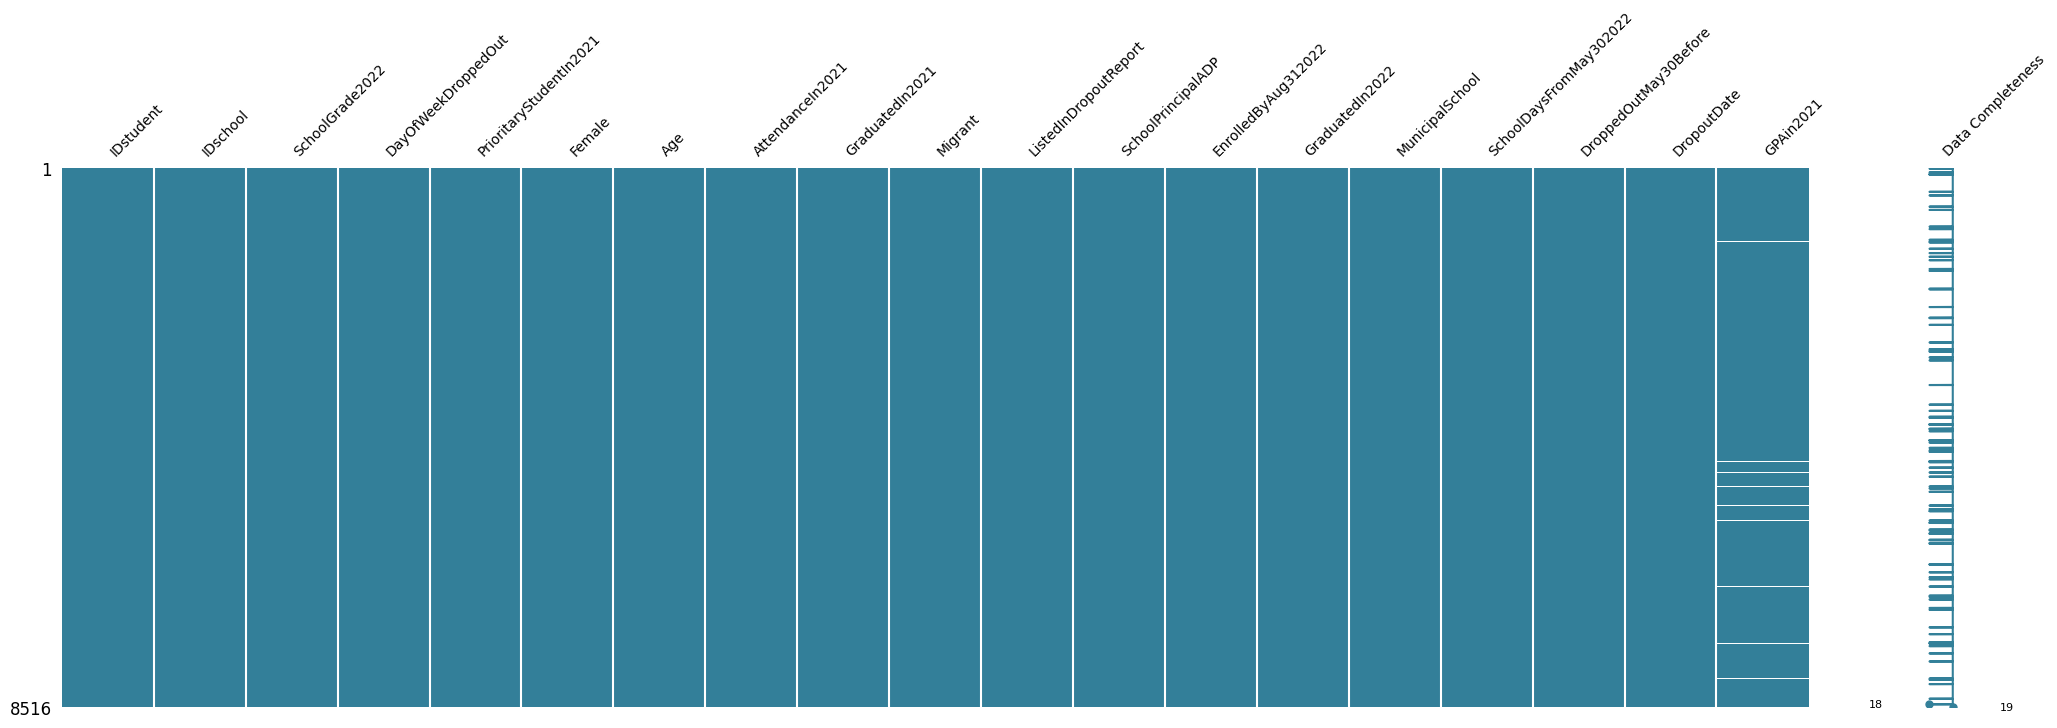

In [11]:
# Matriz de nulos

msno.matrix(df1, figsize=(25, 7), fontsize=10, labels=True, color=(0.2, 0.5, 0.6));

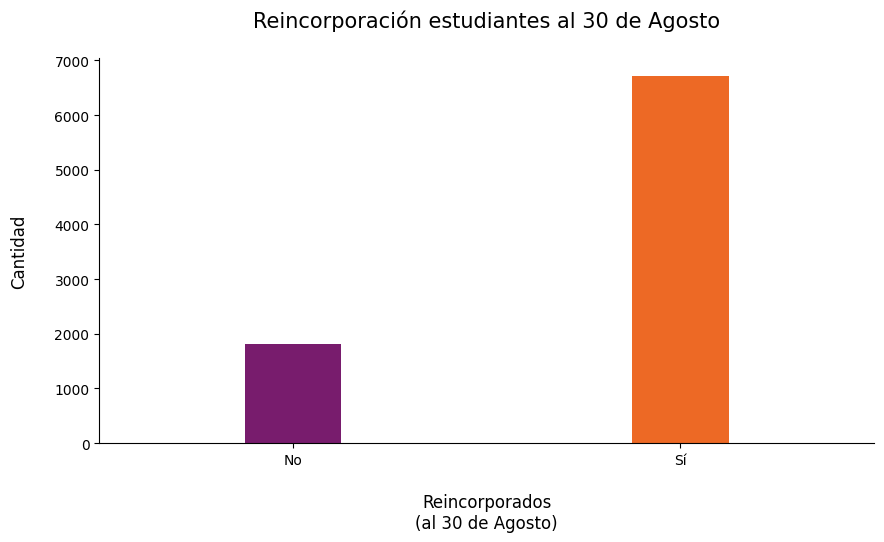

In [14]:
# Graficación vector objetivo 'reincorporado_al_30_agosto'

plt.figure(figsize=(10,5))

sns.countplot(data=df1, 
              x='EnrolledByAug312022', 
              #hue='mujer',
              #stat='percent',
              saturation=1, 
              gap=0.5, 
              palette='inferno', 
              width=0.5);

plt.title('Reincorporación estudiantes al 30 de Agosto\n', fontsize=15, color='black');
plt.xlabel('\nReincorporados\n(al 30 de Agosto)', fontsize=12, color='black');
plt.ylabel('Cantidad\n',fontsize=12, color='black');
plt.xticks(ticks=[0,1], labels=['No', 'Sí'], fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
sns.despine()
plt.show()
#plt.ylim(0,100)
#plt.legend(title='Sexo', fontsize=10, title_fontsize=10, loc='upper right', labels=['Hombre', 'Mujer']);


In [15]:
# Imputamos valores faltantes en la variable GPAin2021 con KNN Imputer

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df1['GPAin2021'] = imputer.fit_transform(df1[['GPAin2021']])
df1.isnull().sum()


IDstudent                  0
IDschool                   0
SchoolGrade2022            0
DayOfWeekDroppedOut        0
PrioritaryStudentIn2021    0
Female                     0
Age                        0
AttendanceIn2021           0
GraduatedIn2021            0
Migrant                    0
ListedInDropoutReport      0
SchoolPrincipalADP         0
EnrolledByAug312022        0
GraduatedIn2022            0
MunicipalSchool            0
SchoolDaysFromMay302022    0
DroppedOutMay30Before      0
DropoutDate                0
GPAin2021                  0
dtype: int64

In [16]:
# CREACIÓN DE DATASET CATEGÓRICO CON ETIQUETAS DESCRIPTIVAS

# Generar etiquetas descriptivas para atributos categóricos del dataset
df1a = df1.iloc[:,2:]
dfcat = df1a.copy()

# Nuevo dataset con etiquetas descriptivas

dfcat['curso_2022'] = dfcat['SchoolGrade2022'].map({1: '1° bas', 2: '2° bas', 3: '3° bas', 4: '4° bas', 5: '5° bas', 6: '6° bas', 7: '7° bas', 8: '8° bas', 9: '1° med', 10: '2° med', 11: '3° med', 12: '4° med'})
dfcat['día_sem'] = dfcat['DayOfWeekDroppedOut'].map({1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 4: 'Jueves', 5: 'Viernes'})
dfcat['est_priorit'] = dfcat['PrioritaryStudentIn2021'].map({0: 'No', 1: 'Sí'})
dfcat['sexo'] = dfcat['Female'].map({0: 'Hombre', 1: 'Mujer'})
dfcat['graduado_2021'] = dfcat['GraduatedIn2021'].map({0: 'No', 1: 'Sí'})
dfcat['est_migrante'] = dfcat['Migrant'].map({0: 'No', 1: 'Sí'})
dfcat['reportado'] = dfcat['ListedInDropoutReport'].map({0: 'No', 1: 'Sí'})
dfcat['dir_ADP'] = dfcat['SchoolPrincipalADP'].map({0: 'No', 1: 'Sí'})
dfcat['reincorp_30ago'] = dfcat['EnrolledByAug312022'].map({0: 'No', 1: 'Sí'})
dfcat['graduado_2022'] = dfcat['GraduatedIn2022'].map({0: 'No', 1: 'Sí'})
dfcat['esc_municipal'] = dfcat['MunicipalSchool'].map({0: 'No', 1: 'Sí'})
dfcat['deserción_antes30may'] = dfcat['DroppedOutMay30Before'].map({0: 'No', 1: 'Sí'})

dfcat = dfcat.drop(columns=df1a.columns)

dfcat.head()

# Guardar dataset con etiquetas descriptivas

dfcat.to_csv('dfcat.csv', index=False)

### Confección/ Recodificación de nuevos atributos

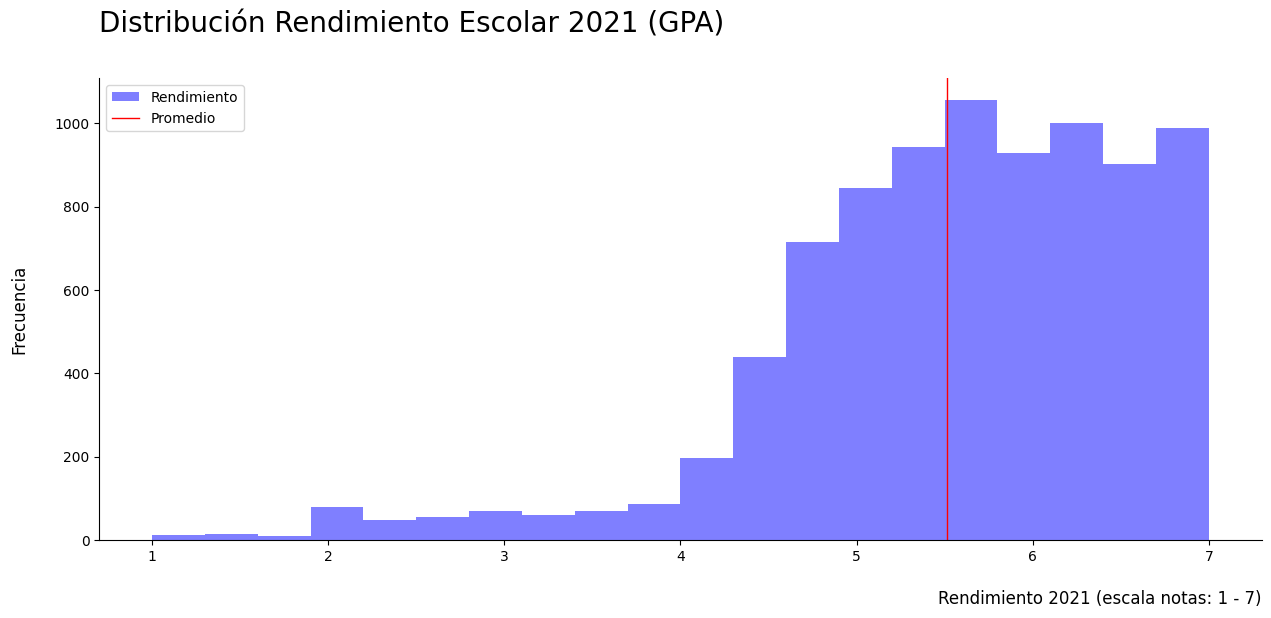

In [156]:
df1['GPAin2021'].plot(kind='hist', bins=20, color='blue', alpha=0.5, figsize=(15,6));
plt.title('Distribución Rendimiento Escolar 2021 (GPA)\n', fontsize=20, color='black', loc='left', pad=10);
plt.xlabel('\nRendimiento 2021 (escala notas: 1 - 7)', fontsize=12, color='black', loc='right');
plt.ylabel('Frecuencia\n',fontsize=12, color='black');
plt.xticks(fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
plt.axvline(df1['GPAin2021'].mean(), color='red', linestyle='-', linewidth=1);
plt.legend(['Rendimiento','Promedio'], fontsize=10, title_fontsize=10, loc='upper left');
sns.despine()
plt.show()


In [157]:
# Nota menor a 4.5 es bajo rendimiento

df1['bajo_rendimiento'] = np.where(df1['GPAin2021'] < 4.5, "Sí", "No")
df1['bajo_rendimiento'].value_counts()

bajo_rendimiento
No    7629
Sí     887
Name: count, dtype: int64

In [159]:
# Con np.where () categorizar GPAin2021 en 4 categorías: menora 4, 4-4.9,5-5.9, mayor a 6

df1['niv_rend'] = np.where(df1['GPAin2021'] < 4, "Menor 4.0", np.where(df1['GPAin2021'] < 5, "4.0 -  4.9", np.where(df1['GPAin2021'] < 6, "5.0 - 5.9", "6.0 - 7.0")))


In [160]:
df1['niv_rend'].value_counts()

niv_rend
5.0 - 5.9     3219
6.0 - 7.0     3183
4.0 -  4.9    1610
Menor 4.0      504
Name: count, dtype: int64

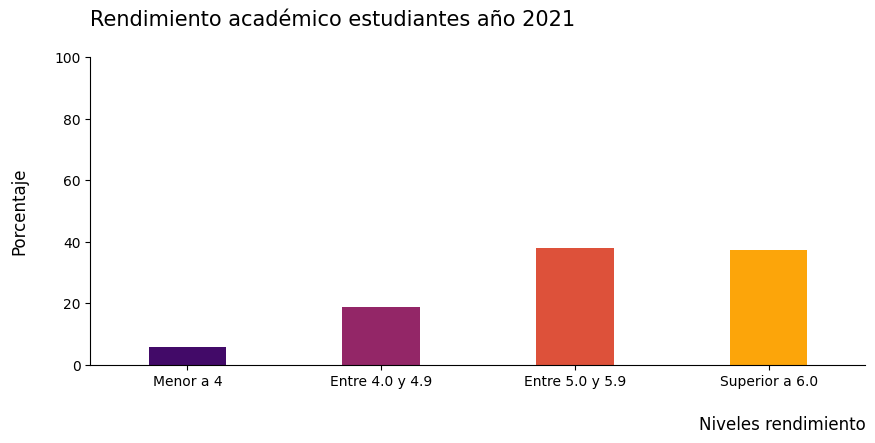

In [161]:
# Graficación niveles de rendimieotn

plt.figure(figsize=(10,4))

sns.countplot(data=df1, 
              x='niv_rend', 
              #hue='mujer',
              stat='percent',
              saturation=1, gap=0.5, palette='inferno');

plt.title('Rendimiento académico estudiantes año 2021\n', fontsize=15, color='black',loc='left');
plt.xlabel('\nNiveles rendimiento', fontsize=12, color='black',loc='right');
plt.ylabel('Porcentaje\n',fontsize=12, color='black');
plt.xticks(ticks=[0,1,2,3], labels=["Menor a 4","Entre 4.0 y 4.9","Entre 5.0 y 5.9","Superior a 6.0"],fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
plt.ylim(0,100);
sns.despine()
plt.show();

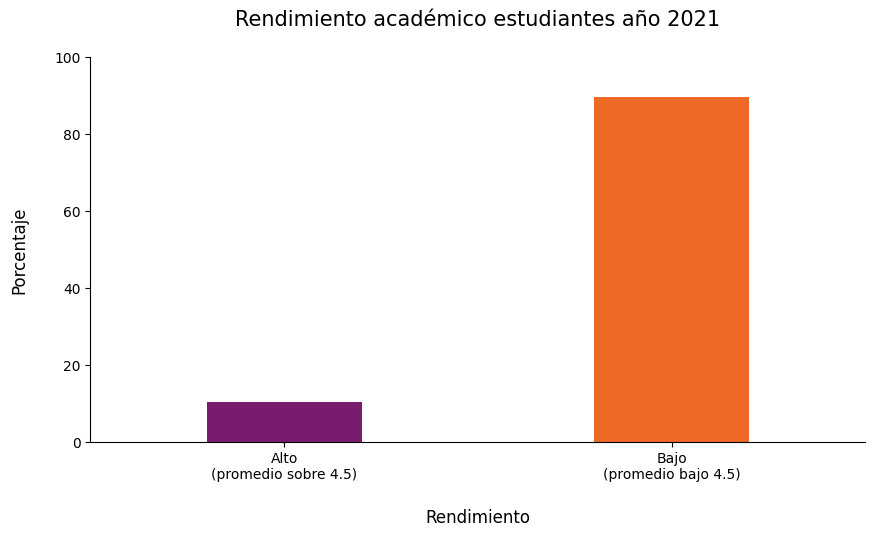

In [162]:
# Graficación de bajo rendimiento   

plt.figure(figsize=(10,5))

sns.countplot(data=df1, 
              x='bajo_rendimiento', 
              #hue='mujer',
              stat='percent',
              saturation=1, gap=0.5, palette='inferno');

plt.title('Rendimiento académico estudiantes año 2021\n', fontsize=15, color='black');
plt.xlabel('\nRendimiento', fontsize=12, color='black');
plt.ylabel('Porcentaje\n',fontsize=12, color='black');
plt.xticks(ticks=[0,1], labels=['Alto\n(promedio sobre 4.5)', 'Bajo\n(promedio bajo 4.5)'], fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
plt.ylim(0,100);
sns.despine()
plt.show();

#plt.legend(title='Sexo', fontsize=10, title_fontsize=10, loc='upper right', labels=['Hombre', 'Mujer']);


#### Recodificación nivel de enseñanza

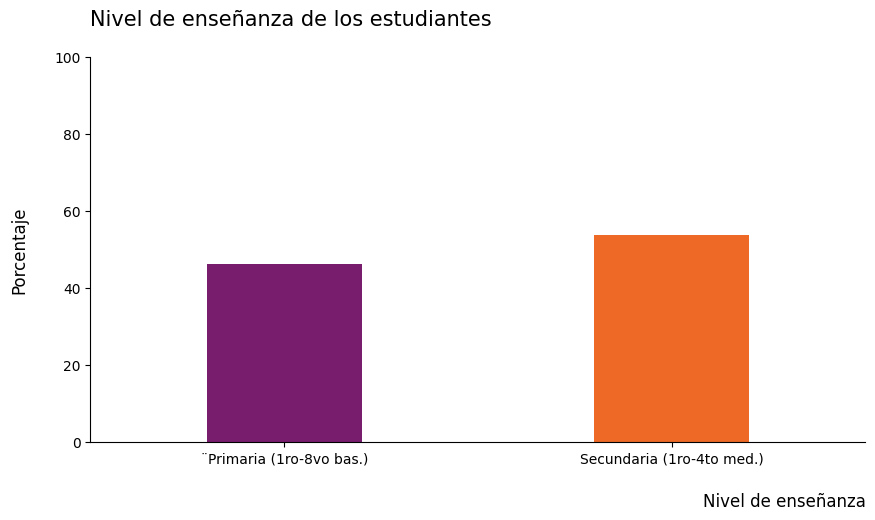

In [164]:
# Graficación de nivel de enseñanza

plt.figure(figsize=(10,5))

sns.countplot(data=df1,
                x='nivel_enseñanza',
                #hue='mujer',
                stat='percent',
                saturation=1, gap=0.5, palette='inferno');

plt.title('Nivel de enseñanza de los estudiantes\n', fontsize=15, color='black',loc='left');
plt.xlabel('\nNivel de enseñanza', fontsize=12, color='black',loc='right');
plt.ylabel('Porcentaje\n',fontsize=12, color='black');
plt.xticks(ticks=[0,1],labels=['¨Primaria (1ro-8vo bas.)','Secundaria (1ro-4to med.)'],fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
plt.ylim(0,100);
sns.despine()
plt.show();



In [163]:
# Nivel enseñanza

df1['nivel_enseñanza'] = np.where(df1['SchoolGrade2022'] < 9, 'Primaria', 'Secundaria')
df1['nivel_enseñanza'].value_counts()

nivel_enseñanza
Primaria      4579
Secundaria    3937
Name: count, dtype: int64

In [165]:
# TRAMOS DE ENSEÑANZA

df1['nivel_enseñanza2'] = np.where(
    df1['SchoolGrade2022'] < 5, '1. 1ro-4to básico',
    np.where(
        (df1['SchoolGrade2022'] >= 5) & (df1['SchoolGrade2022'] < 9), '2. 5to-8vo básico',
        np.where(
            (df1['SchoolGrade2022'] >= 9) & (df1['SchoolGrade2022'] < 11), '3. 1ro-2do medio',
            '4. 3ro-4to medio'
        )
    )
)

df1['nivel_enseñanza2'].value_counts()

nivel_enseñanza2
2. 5to-8vo básico        2535
3. 1ro-2do medio         2270
1. 1ro-4to básicosico    2044
4. 3ro-4to medio         1667
Name: count, dtype: int64

In [166]:
df1['nivel_enseñanza2'].sort_values().unique()

array(['1. 1ro-4to básicosico', '2. 5to-8vo básico', '3. 1ro-2do medio',
       '4. 3ro-4to medio'], dtype=object)

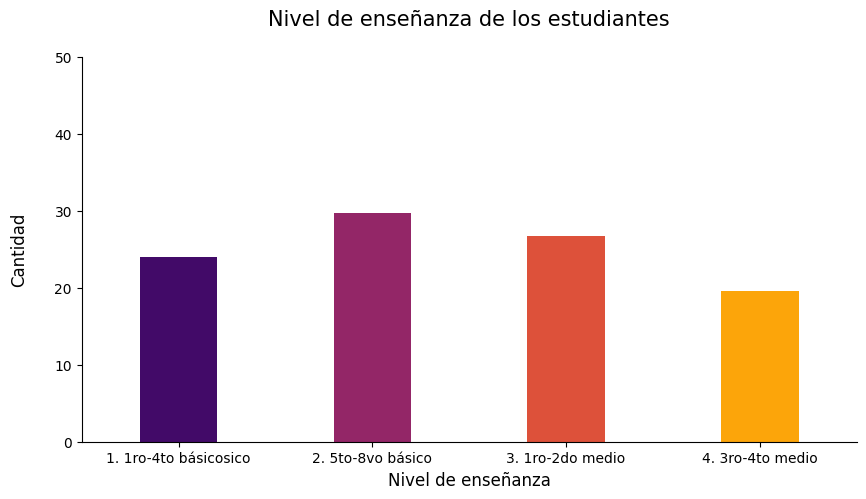

In [167]:
# Graficación de TRAMOS de enseñanza

plt.figure(figsize=(10,5))
df1['nivel_enseñanza2'].sort_values()
sns.countplot(x=df1['nivel_enseñanza2'].sort_values(),
                #hue='mujer',
                stat='percent',
                saturation=1, 
                gap=0.5, 
                palette='inferno');

plt.title('Nivel de enseñanza de los estudiantes\n', fontsize=15, color='black');
plt.xlabel('Nivel de enseñanza', fontsize=12, color='black');
plt.ylabel('Cantidad\n',fontsize=12, color='black');
plt.xticks(fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
plt.ylim(0,50);
sns.despine()
plt.show()
#plt.ylim(0,100);


In [168]:
df1['periodo_abandono'] = np.where(df['DropoutDate'] < '2022-05-31', 'Antes_31_mayo', 'Después_31_mayo')
df1['periodo_abandono'].value_counts()

periodo_abandono
Antes_31_mayo      4604
Después_31_mayo    3912
Name: count, dtype: int64

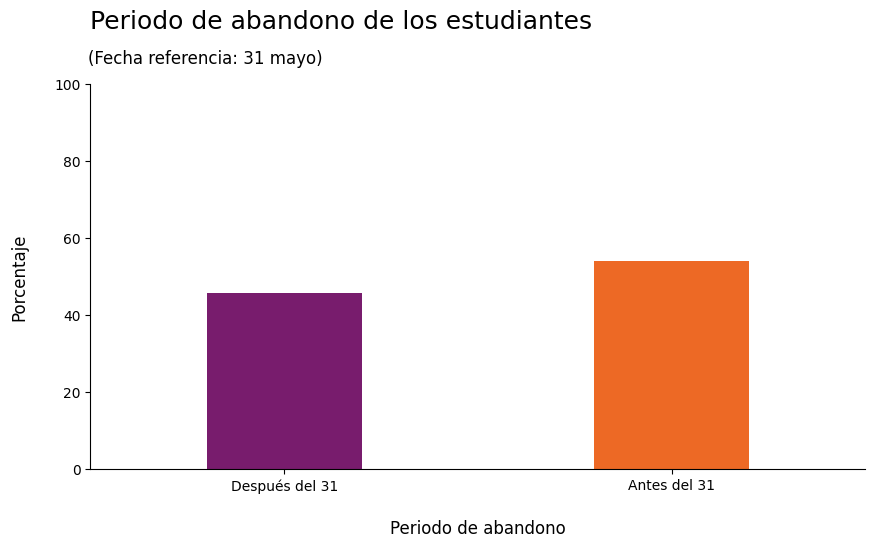

In [169]:
# Graficación de periodo de abandono

plt.figure(figsize=(10,5))

sns.countplot(data=df1,
                x='periodo_abandono',
                stat='percent',
                saturation=1, 
                gap=0.5, 
                palette='inferno');

plt.title('Periodo de abandono de los estudiantes\n', fontsize=18, color='black', pad=20,loc='left');
plt.suptitle('(Fecha referencia: 31 mayo)', fontsize=12, color='black', x=0.24, y=0.95);
plt.xlabel('\nPeriodo de abandono', fontsize=12, color='black');
plt.ylabel('Porcentaje\n',fontsize=12, color='black');
plt.xticks(labels=['Después del 31','Antes del 31'],ticks=['Después_31_mayo','Antes_31_mayo'],fontsize=10, color='black');
plt.yticks(fontsize=10, color='black');
plt.ylim(0,100);
sns.despine()



In [170]:
df1.columns.to_list()

['IDstudent',
 'IDschool',
 'SchoolGrade2022',
 'DayOfWeekDroppedOut',
 'PrioritaryStudentIn2021',
 'Female',
 'Age',
 'AttendanceIn2021',
 'GraduatedIn2021',
 'Migrant',
 'ListedInDropoutReport',
 'SchoolPrincipalADP',
 'EnrolledByAug312022',
 'GraduatedIn2022',
 'MunicipalSchool',
 'SchoolDaysFromMay302022',
 'DroppedOutMay30Before',
 'DropoutDate',
 'GPAin2021',
 'bajo_rendimiento',
 'niv_rend',
 'nivel_enseñanza',
 'nivel_enseñanza2',
 'periodo_abandono']

In [171]:
df1['Age'].value_counts(sort=False)

Age
18    175
15    970
14    931
17    556
13    841
8     636
16    792
12    649
6     537
10    565
11    615
9     552
7     655
19     42
Name: count, dtype: int64

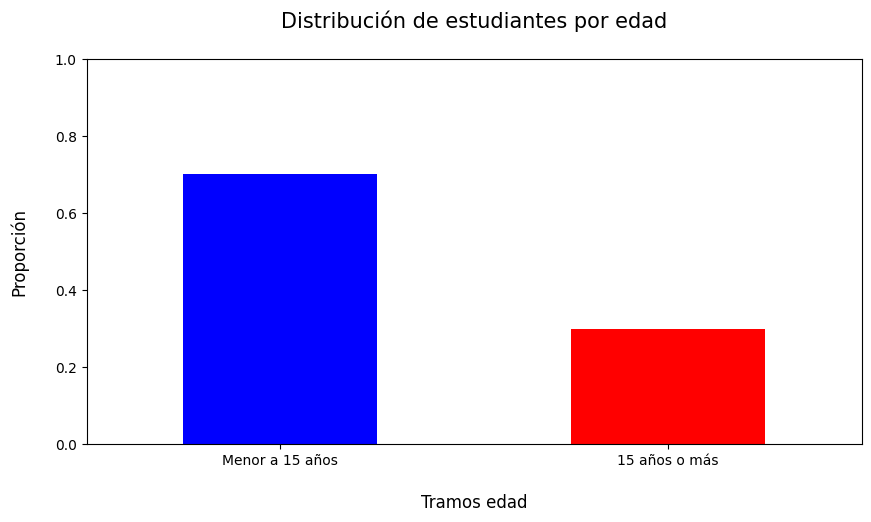

In [172]:
# Binarizar con np.where() variable age en dois categorías: menor a 15 y mayor a 15 

df1['edad_2'] = np.where(df1['Age'] < 15, "Menor 15", "15 o más")

df1['edad_2'].value_counts("%").plot(kind='bar', figsize=(10,5), color=['blue', 'red']);
plt.title('Distribución de estudiantes por edad\n', fontsize=15, color='black');
plt.ylim(0,1)
plt.xlabel('\nTramos edad', fontsize=12, color='black');
plt.ylabel('Proporción\n',fontsize=12, color='black');
plt.xticks(ticks=[0,1], labels=['Menor a 15 años', '15 años o más'], fontsize=10, color='black', rotation=0);
plt.yticks(fontsize=10, color='black');
plt.show()


In [173]:
# codifcar variables object

#df1['nivel_enseñanza'] = df1['nivel_enseñanza'].replace({'Primaria':0, 'Secundaria':1})
#df1['periodo_abandono'] = df1['periodo_abandono'].replace({'Antes_corte':0, 'Después_corte':1})

df1.head(5)

,IDstudent,IDschool,SchoolGrade2022,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before,DropoutDate,GPAin2021,bajo_rendimiento,niv_rend,nivel_enseñanza,nivel_enseñanza2,periodo_abandono,edad_2
0,1,1,12,5,0,0,18,55,0,0,0,1,0,0,1,-14,0,2022-06-17,2.0,Sí,Menor 4.0,Secundaria,4. 3ro-4to medio,Después_31_mayo,15 o más
1,2,1,9,5,0,1,15,55,0,0,1,1,1,0,1,11,1,2022-05-13,2.5,Sí,Menor 4.0,Secundaria,3. 1ro-2do medio,Antes_31_mayo,15 o más
2,3,1,10,3,1,1,14,88,1,0,0,1,0,0,1,28,1,2022-04-20,4.9,No,4.0 - 4.9,Secundaria,3. 1ro-2do medio,Antes_31_mayo,Menor 15
3,4,4,10,1,1,1,14,90,1,0,1,1,0,0,1,20,1,2022-05-02,5.8,No,5.0 - 5.9,Secundaria,3. 1ro-2do medio,Antes_31_mayo,Menor 15
4,5,4,12,3,0,1,17,100,1,0,0,1,0,0,1,-12,0,2022-06-15,4.6,No,4.0 - 4.9,Secundaria,4. 3ro-4to medio,Después_31_mayo,15 o más


In [174]:
df1.columns.to_list()

['IDstudent',
 'IDschool',
 'SchoolGrade2022',
 'DayOfWeekDroppedOut',
 'PrioritaryStudentIn2021',
 'Female',
 'Age',
 'AttendanceIn2021',
 'GraduatedIn2021',
 'Migrant',
 'ListedInDropoutReport',
 'SchoolPrincipalADP',
 'EnrolledByAug312022',
 'GraduatedIn2022',
 'MunicipalSchool',
 'SchoolDaysFromMay302022',
 'DroppedOutMay30Before',
 'DropoutDate',
 'GPAin2021',
 'bajo_rendimiento',
 'niv_rend',
 'nivel_enseñanza',
 'nivel_enseñanza2',
 'periodo_abandono',
 'edad_2']

#### Generación de nuevos atributos

In [176]:
df1['fecha_reporte'] = '2022-08-31'

In [177]:
df1['fecha_reporte'] = pd.to_datetime(df1['fecha_reporte'])

In [178]:
df1['anticipacion_abandono'] = df1['fecha_reporte'] - df['DropoutDate']  

In [179]:
df1.head(3)

,IDstudent,IDschool,SchoolGrade2022,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before,DropoutDate,GPAin2021,bajo_rendimiento,niv_rend,nivel_enseñanza,nivel_enseñanza2,periodo_abandono,edad_2,fecha_reporte,anticipacion_abandono
0,1,1,12,5,0,0,18,55,0,0,0,1,0,0,1,-14,0,2022-06-17,2.0,Sí,Menor 4.0,Secundaria,4. 3ro-4to medio,Después_31_mayo,15 o más,2022-08-31,75 days
1,2,1,9,5,0,1,15,55,0,0,1,1,1,0,1,11,1,2022-05-13,2.5,Sí,Menor 4.0,Secundaria,3. 1ro-2do medio,Antes_31_mayo,15 o más,2022-08-31,110 days
2,3,1,10,3,1,1,14,88,1,0,0,1,0,0,1,28,1,2022-04-20,4.9,No,4.0 - 4.9,Secundaria,3. 1ro-2do medio,Antes_31_mayo,Menor 15,2022-08-31,133 days


In [180]:
df1['anticipacion_abandono'].value_counts().sort_values(ascending=False)

anticipacion_abandono
36 days     307
37 days     273
35 days     245
33 days     207
121 days    197
           ... 
89 days      85
58 days      72
56 days      43
57 days      27
72 days      13
Name: count, Length: 61, dtype: int64

In [181]:
df1['anticipacion_abandono'] = df1['anticipacion_abandono'].dt.days

In [183]:
df1.head(3)

,IDstudent,IDschool,SchoolGrade2022,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before,DropoutDate,GPAin2021,bajo_rendimiento,niv_rend,nivel_enseñanza,nivel_enseñanza2,periodo_abandono,edad_2,fecha_reporte,anticipacion_abandono
0,1,1,12,5,0,0,18,55,0,0,0,1,0,0,1,-14,0,2022-06-17,2.0,Sí,Menor 4.0,Secundaria,4. 3ro-4to medio,Después_31_mayo,15 o más,2022-08-31,75
1,2,1,9,5,0,1,15,55,0,0,1,1,1,0,1,11,1,2022-05-13,2.5,Sí,Menor 4.0,Secundaria,3. 1ro-2do medio,Antes_31_mayo,15 o más,2022-08-31,110
2,3,1,10,3,1,1,14,88,1,0,0,1,0,0,1,28,1,2022-04-20,4.9,No,4.0 - 4.9,Secundaria,3. 1ro-2do medio,Antes_31_mayo,Menor 15,2022-08-31,133


In [185]:
# Dicotomizar attendanceIn2021 en dos categorías: menor a 85% y mayor a 85%

df1['asistencia_2021'] = np.where(df1['AttendanceIn2021'] < 85, "Menos del 85%", "85% y más")
df1['asistencia_2021'].value_counts()

asistencia_2021
85% y más        7033
Menos del 85%    1483
Name: count, dtype: int64

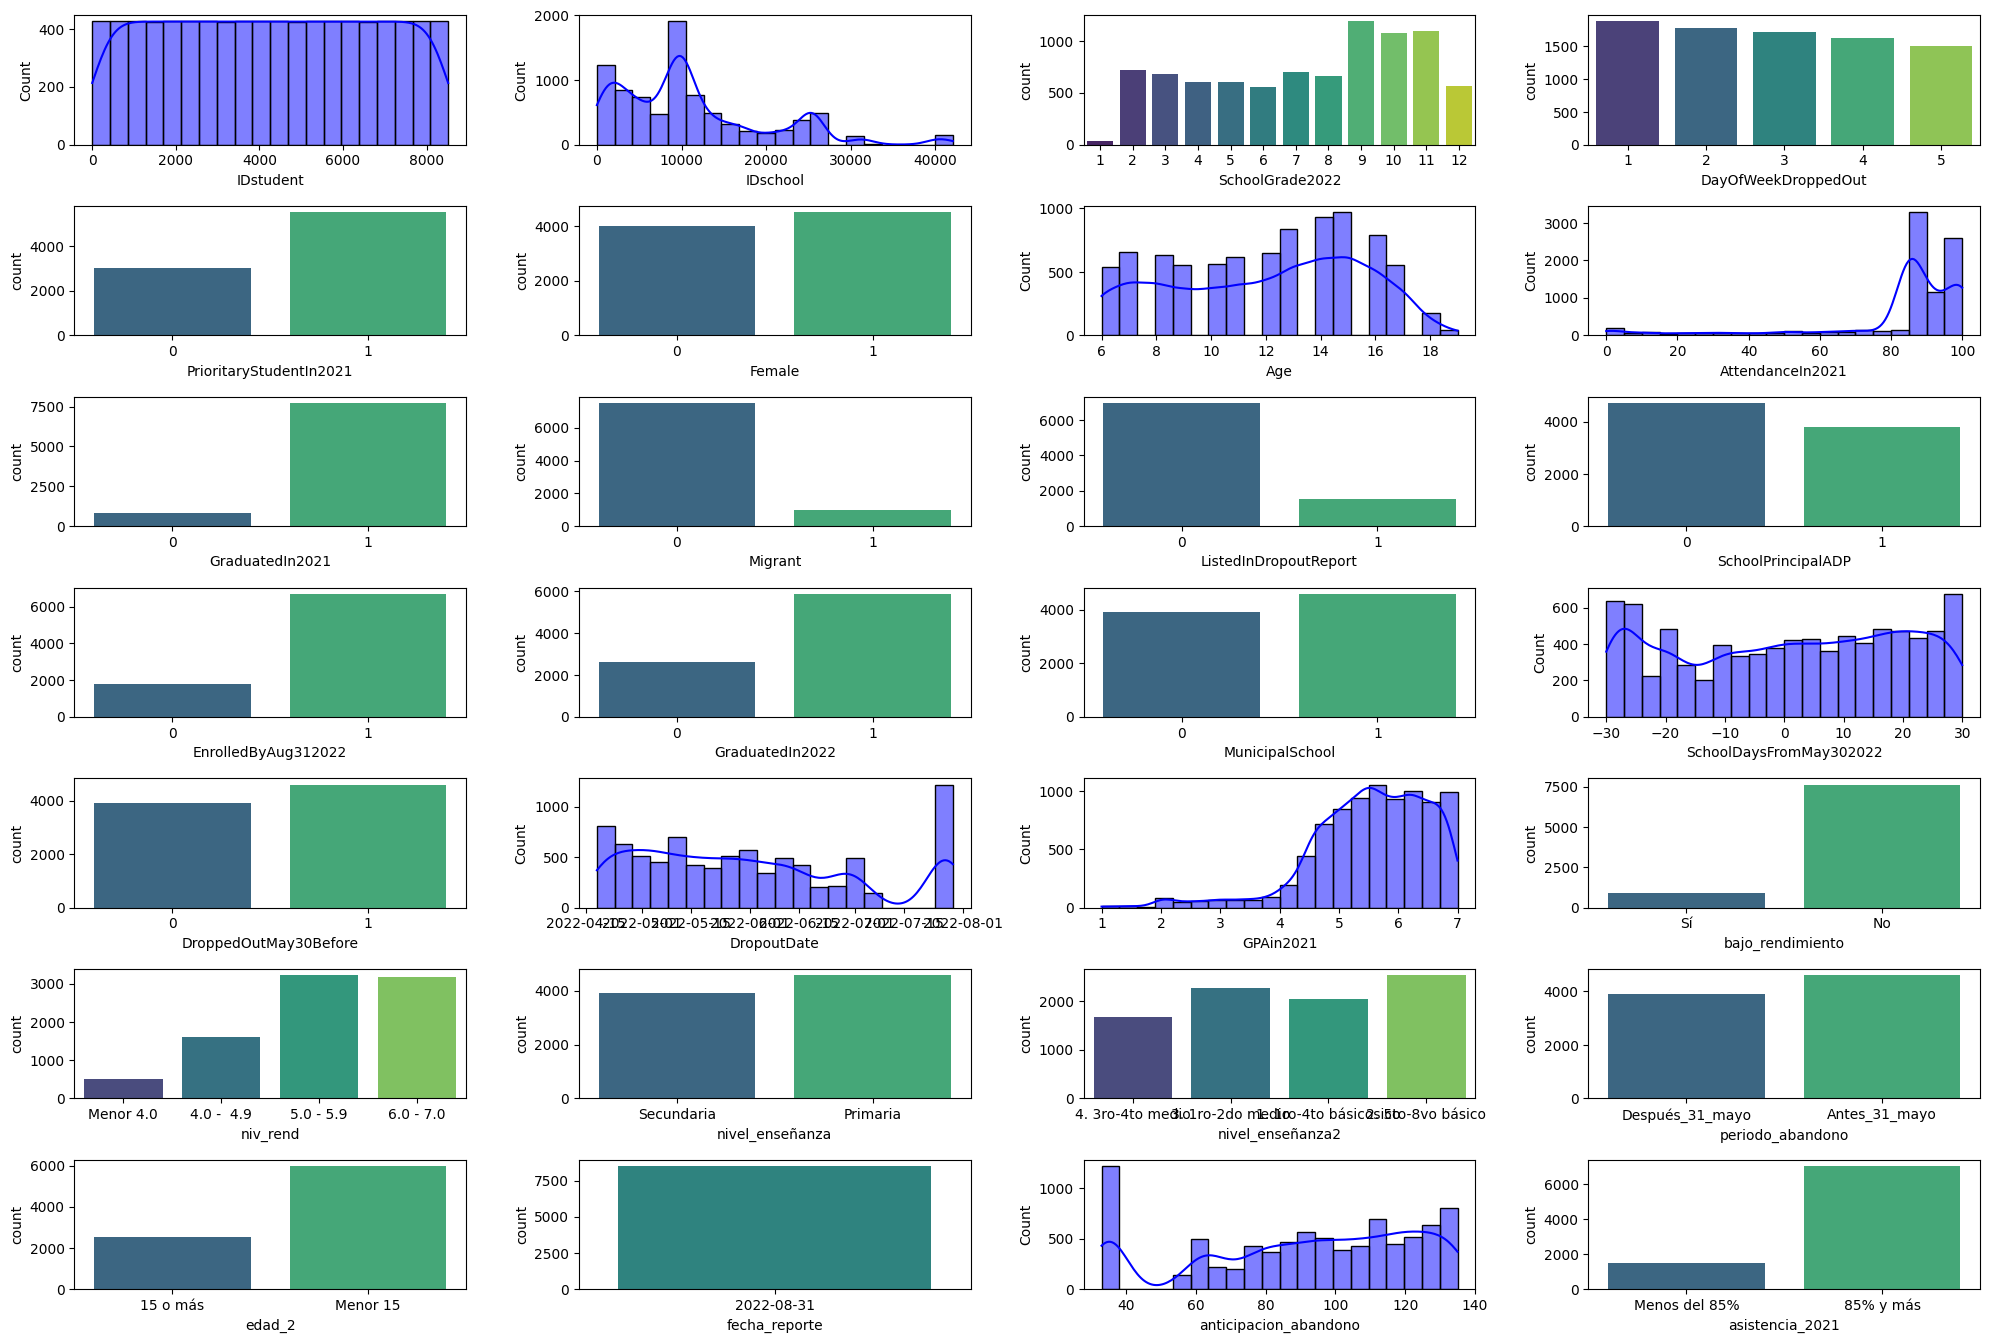

In [187]:
nrows=8
ncols=4

plt.figure(figsize=(20,15))

for cols in df1.columns:
    if df1[cols].nunique() < 13:
        plt.subplot(nrows, ncols, df1.columns.get_loc(cols)+1)
        sns.countplot(data=df1, x=cols, palette='viridis');
        #plt.title(cols)
    
    else:
        plt.subplot(nrows, ncols, df1.columns.get_loc(cols)+1)
        sns.histplot(df1[cols], kde=True, color='blue', bins=20);
        #plt.title(cols)

plt.tight_layout();

In [189]:
# Borramos columnas que no se utilizarán en el modelo

df1.drop(columns=['IDstudent','IDschool','SchoolGrade2022','AttendanceIn2021','GraduatedIn2022','SchoolDaysFromMay302022','DropoutDate','GPAin2021','bajo_rendimiento','edad_2','fecha_reporte'], axis=1, inplace=True)
df.shape

(8516, 19)

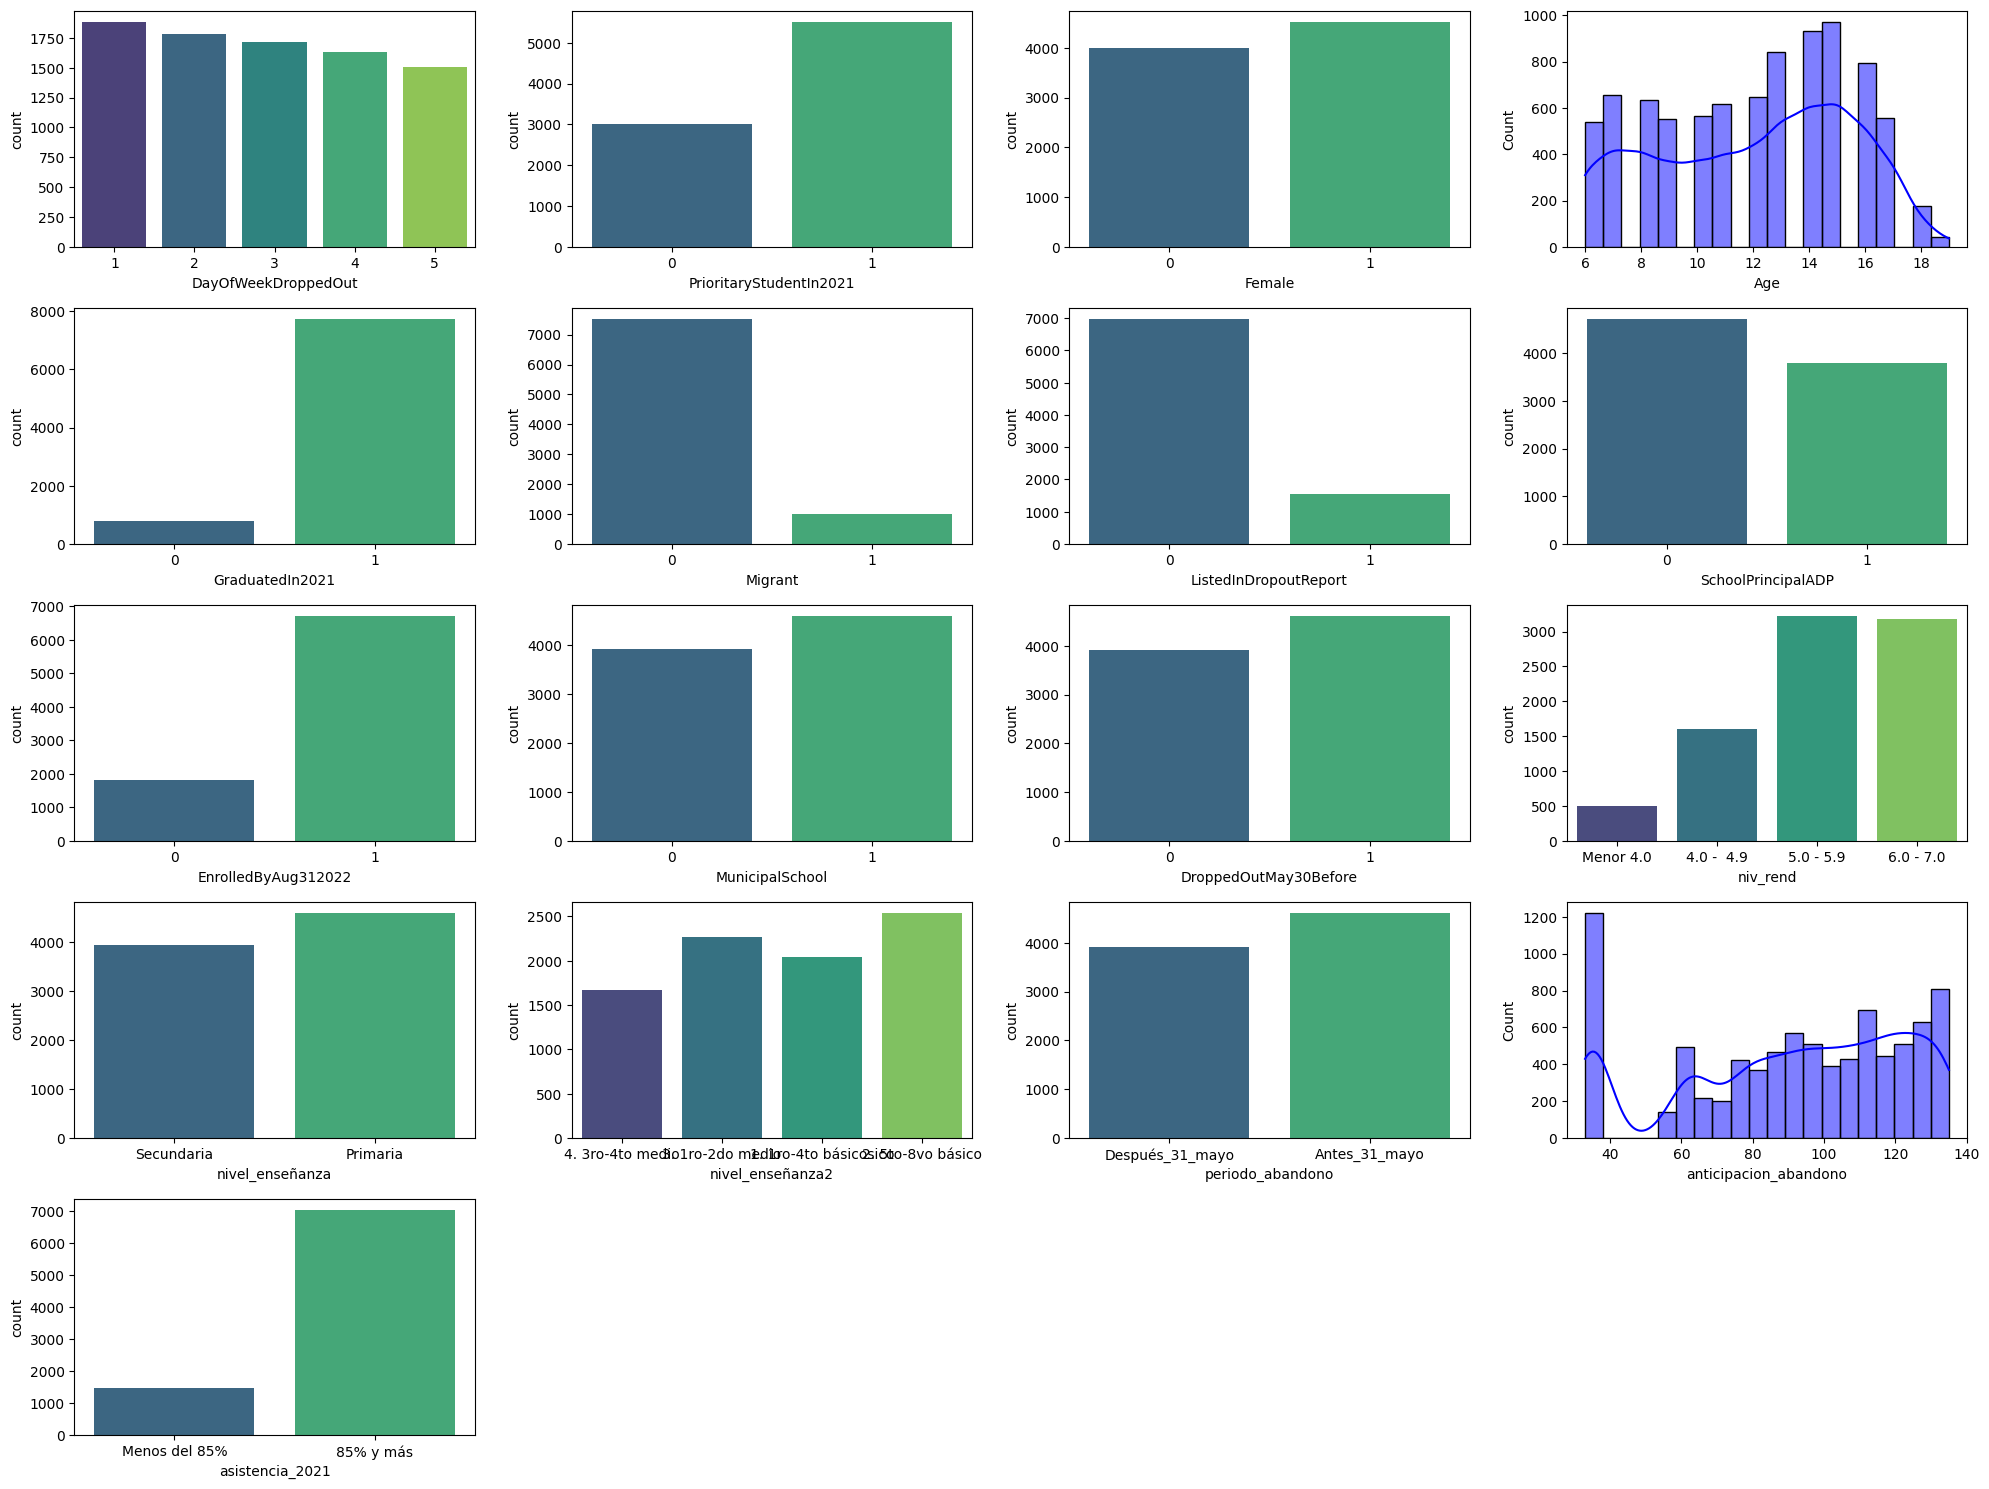

In [ ]:
# Grafiación de variables

nrows=5
ncols=4

plt.figure(figsize=(20,15))

for cols in df1.columns:
    if df1[cols].nunique() < 13:
        plt.subplot(nrows, ncols, df1.columns.get_loc(cols)+1)
        sns.countplot(data=df1, x=cols, palette='viridis');
        #plt.title(cols)
    
    else:
        plt.subplot(nrows, ncols, df1.columns.get_loc(cols)+1)
        sns.histplot(df1[cols], kde=True, color='blue', bins=20);
        #plt.title(cols)

plt.tight_layout();

In [192]:
# Guardar el dataset para análisis posterior

df1.to_csv('casestudy_dropout_clean.csv', index=False)

In [3]:
import pandas as pd
pd.read_csv('data/casestudy_dropout_clean.csv').head()

,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,MunicipalSchool,DroppedOutMay30Before,niv_rend,nivel_enseñanza,nivel_enseñanza2,periodo_abandono,anticipacion_abandono,asistencia_2021
0,5,0,0,18,0,0,0,1,0,1,0,Menor 4.0,Secundaria,4. 3ro-4to medio,Después_31_mayo,75,Menos del 85%
1,5,0,1,15,0,0,1,1,1,1,1,Menor 4.0,Secundaria,3. 1ro-2do medio,Antes_31_mayo,110,Menos del 85%
2,3,1,1,14,1,0,0,1,0,1,1,4.0 - 4.9,Secundaria,3. 1ro-2do medio,Antes_31_mayo,133,85% y más
3,1,1,1,14,1,0,1,1,0,1,1,5.0 - 5.9,Secundaria,3. 1ro-2do medio,Antes_31_mayo,121,85% y más
4,3,0,1,17,1,0,0,1,0,1,0,4.0 - 4.9,Secundaria,4. 3ro-4to medio,Después_31_mayo,77,85% y más
